#Linear Regression in AMD stock price prediction

In [64]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
#load data
datafile = pd.read_csv("AMD (1980 -11.07.2023).csv")
datafile.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [67]:
#Add Prev_close column to store previous close price
series_shifted = datafile['Close'].shift()
datafile['Prev_close'] = series_shifted
datafile.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_close
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200,NaN
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200,3.031250
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800,3.010417
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800,2.916667


In [69]:
#Drop unused column for train data
datafile = datafile.drop(columns = ['Adj Close'])
datafile.head()

,Date,Open,High,Low,Close,Volume,Prev_close
0,1980-03-18,0.0,3.125000,2.937500,3.031250,727200,NaN
1,1980-03-19,0.0,3.083333,3.020833,3.041667,295200,3.031250
2,1980-03-20,0.0,3.062500,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.0,3.020833,2.906250,2.916667,130800,3.010417
4,1980-03-24,0.0,2.916667,2.635417,2.666667,436800,2.916667


In [71]:
datafile.shape

(10919, 7)

In [73]:
#null entries check (need to remove those data)
datafile.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Prev_close    1
dtype: int64

In [75]:
#drop / remove NaN row or column
#inplace = true to execute dropna right on it file so python
#dont have to create a copy and we have to re-initialize and
#add to a new datafile variable
datafile.dropna(inplace = True)
datafile

,Date,Open,High,Low,Close,Volume,Prev_close
1,1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,3.031250
2,1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,3.010417
4,1980-03-24,0.000000,2.916667,2.635417,2.666667,436800,2.916667
5,1980-03-25,0.000000,2.750000,2.552083,2.604167,645600,2.666667
...,...,...,...,...,...,...,...
10914,2023-07-03,115.160004,116.730003,114.510002,115.820000,31860000,113.910004
10915,2023-07-05,116.099998,117.660004,113.860001,113.949997,49501600,115.820000
10916,2023-07-06,112.070000,113.790001,110.309998,113.480003,42342000,113.949997
10917,2023-07-07,114.160004,115.330002,113.040001,113.169998,37135100,113.480003


In [77]:
#check file info
datafile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10918 entries, 1 to 10918
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        10918 non-null  object 
 1   Open        10918 non-null  float64
 2   High        10918 non-null  float64
 3   Low         10918 non-null  float64
 4   Close       10918 non-null  float64
 5   Volume      10918 non-null  int64  
 6   Prev_close  10918 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 682.4+ KB


In [79]:
datafile.describe()

,Open,High,Low,Close,Volume,Prev_close
count,10918.000000,10918.000000,10918.000000,10918.000000,1.091800e+04,10918.000000
mean,16.844206,17.512060,16.762901,17.140225,1.846657e+07,17.130099
std,23.318226,23.610291,22.616046,23.122284,2.815709e+07,23.104246
min,0.000000,1.690000,1.610000,1.620000,0.000000e+00,1.620000
25%,4.965000,5.437500,5.125000,5.302500,1.226950e+06,5.300000
50%,9.875000,10.062500,9.630000,9.875000,6.833200e+06,9.875000
75%,16.125000,16.404688,15.807500,16.120001,2.284092e+07,16.113438
max,163.279999,164.460007,156.100006,161.910004,3.250584e+08,161.910004


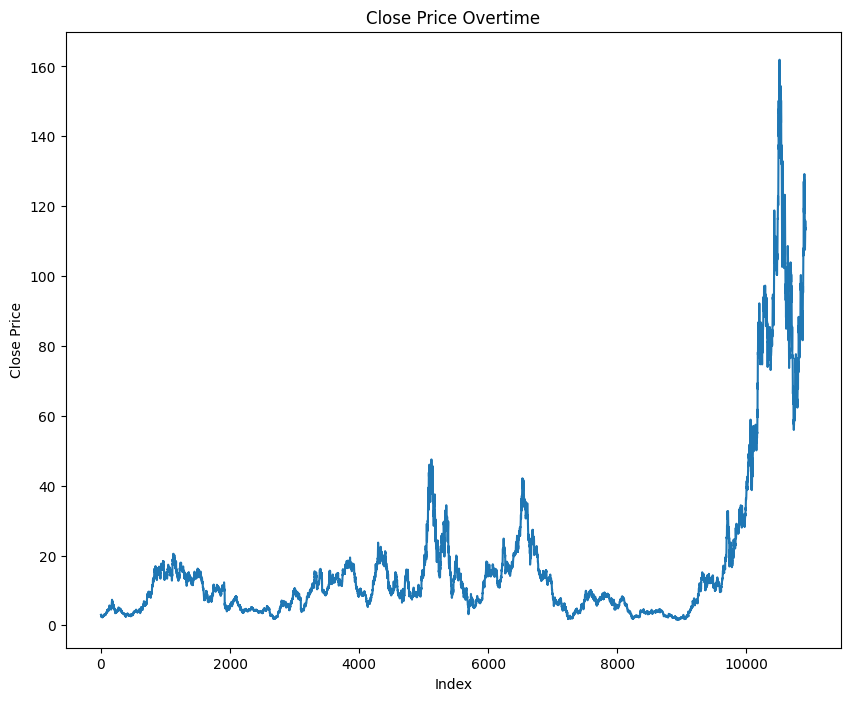

In [81]:
#plot close price (Draw close price figure)
datafile['Close'].plot(figsize = (10, 8))
plt.title("Close Price Overtime")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()

In [82]:
#define target x and y (calculate close)
x = datafile[['Open', 'Prev_close', 'High', 'Low']]
y = datafile['Close']

In [83]:
#allocate data for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [84]:
print(x_train.shape, x_test.shape)

(8188, 4) (2730, 4)


In [85]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [86]:
#print regressor
#
print(regressor.coef_)
print(regressor.intercept_)

[-0.04259091 -0.33022824  0.69590042  0.67628903]
-0.011557549188673022


In [87]:
#predicted value
predicted = regressor.predict(x_test)
print(x_test)
print(predicted)

            Open  Prev_close       High        Low
1534   15.000000   15.125000  15.437500  14.875000
4440   14.375000   15.000000  15.437500  14.312500
7604    8.300000    8.270000   8.670000   7.920000
1313   14.625000   14.625000  14.687500  14.312500
5976   17.549999   17.860001  17.559999  16.850000
...          ...         ...        ...        ...
10212  79.349998   78.930000  79.720001  76.540001
7030    7.100000    7.150000   7.490000   6.980000
9568   12.140000   12.070000  12.430000  12.050000
3853   17.562500   17.625000  17.875000  17.375000
4783    8.562500    8.562500   9.000000   8.468750

[2730 rows x 4 columns]
[15.15763889 14.84512416  8.2936162  ... 12.28485911 17.60990896
  8.78660508]


In [88]:
predicted.shape

(2730,)

In [89]:
#Comparison predicted to actual test
_datafile = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_datafile)

          Actual  Predicted
1534   15.250000  15.157639
4440   15.312500  14.845124
7604    8.380000   8.293616
1313   14.375000  14.436387
5976   17.360001  16.958576
...          ...        ...
10212  76.660004  77.784285
7030    7.460000   7.257707
9568   12.420000  12.284859
3853   17.875000  17.609909
4783    8.812500   8.786605

[2730 rows x 2 columns]


In [90]:
#Score
regressor.score(x_test, y_test)

0.9997232796876515

In [91]:
import math
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error  0.18989620796015894
Mean Square Error  0.14985873566253555
Root Mean Error  0.38711592018739754


In [92]:
predicted = regressor.predict(x)
print(predicted)

[  3.17608707   3.15110517   3.06198172 ... 111.37372445 114.35787301
 111.17562557]


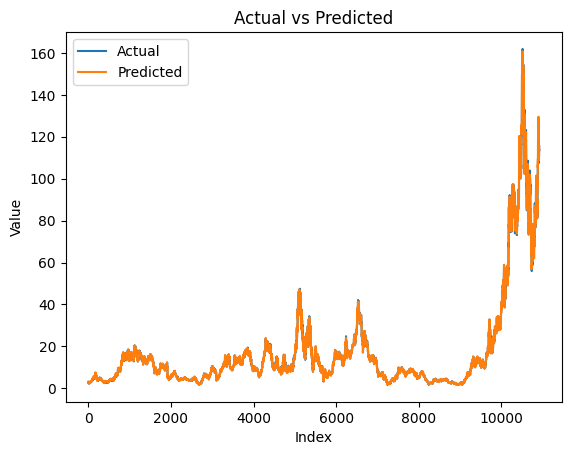

In [93]:
#plot the graph
plt.plot(y, label = "Actual")
plt.plot(predicted, label = "Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [102]:
#load test data
new_data = pd.read_csv("AMD (2023 - 08.04.2024).csv")
new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,66.000000,66.879997,63.590000,64.019997,64.019997,46851800
1,2023-01-04,65.000000,65.790001,63.310001,64.660004,64.660004,47477100
2,2023-01-05,64.150002,64.349998,62.299999,62.330002,62.330002,46159500
3,2023-01-06,63.150002,64.300003,60.049999,63.959999,63.959999,70161300
4,2023-01-09,66.220001,69.320000,65.669998,67.239998,67.239998,69741300


In [103]:
series_shifted = new_data['Close'].shift()
new_data['Prev_close'] = series_shifted
new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_close
0,2023-01-03,66.000000,66.879997,63.590000,64.019997,64.019997,46851800,NaN
1,2023-01-04,65.000000,65.790001,63.310001,64.660004,64.660004,47477100,64.019997
2,2023-01-05,64.150002,64.349998,62.299999,62.330002,62.330002,46159500,64.660004
3,2023-01-06,63.150002,64.300003,60.049999,63.959999,63.959999,70161300,62.330002
4,2023-01-09,66.220001,69.320000,65.669998,67.239998,67.239998,69741300,63.959999


In [104]:
#Drop unused column for test data
new_data = new_data.drop(columns = ['Adj Close'])
new_data.head()

,Date,Open,High,Low,Close,Volume,Prev_close
0,2023-01-03,66.000000,66.879997,63.590000,64.019997,46851800,NaN
1,2023-01-04,65.000000,65.790001,63.310001,64.660004,47477100,64.019997
2,2023-01-05,64.150002,64.349998,62.299999,62.330002,46159500,64.660004
3,2023-01-06,63.150002,64.300003,60.049999,63.959999,70161300,62.330002
4,2023-01-09,66.220001,69.320000,65.669998,67.239998,69741300,63.959999


In [105]:
new_data.shape

(316, 7)

In [106]:
#null entries check (need to remove those data)
new_data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Prev_close    1
dtype: int64

In [107]:
new_data.dropna(inplace = True)
new_data

,Date,Open,High,Low,Close,Volume,Prev_close
1,2023-01-04,65.000000,65.790001,63.310001,64.660004,47477100,64.019997
2,2023-01-05,64.150002,64.349998,62.299999,62.330002,46159500,64.660004
3,2023-01-06,63.150002,64.300003,60.049999,63.959999,70161300,62.330002
4,2023-01-09,66.220001,69.320000,65.669998,67.239998,69741300,63.959999
5,2023-01-10,66.669998,68.150002,66.559998,68.050003,41149600,67.239998
...,...,...,...,...,...,...,...
311,2024-04-01,180.100006,187.240005,179.899994,183.339996,74299900,180.490005
312,2024-04-02,179.470001,180.100006,174.830002,178.699997,61598800,183.339996
313,2024-04-03,177.539993,182.050003,176.699997,180.770004,49835100,178.699997
314,2024-04-04,182.919998,183.020004,165.649994,165.830002,88280000,180.770004


In [108]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 1 to 315
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        315 non-null    object 
 1   Open        315 non-null    float64
 2   High        315 non-null    float64
 3   Low         315 non-null    float64
 4   Close       315 non-null    float64
 5   Volume      315 non-null    int64  
 6   Prev_close  315 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.7+ KB


In [109]:
new_data.describe()

,Open,High,Low,Close,Volume,Prev_close
count,315.000000,315.000000,315.000000,315.000000,3.150000e+02,315.000000
mean,117.998984,120.375238,115.772063,118.208984,6.491314e+07,117.871206
std,34.266418,34.902397,33.343249,34.110073,2.286990e+07,34.118219
min,63.150002,64.300003,60.049999,62.330002,1.900100e+07,62.330002
25%,96.064999,97.154999,93.659999,96.009998,4.933140e+07,95.944999
50%,109.400002,111.779999,107.459999,110.089996,5.817710e+07,110.010002
75%,132.285004,136.234993,130.074997,134.865005,7.332235e+07,131.800003
max,213.410004,227.300003,208.220001,211.380005,1.733720e+08,211.380005


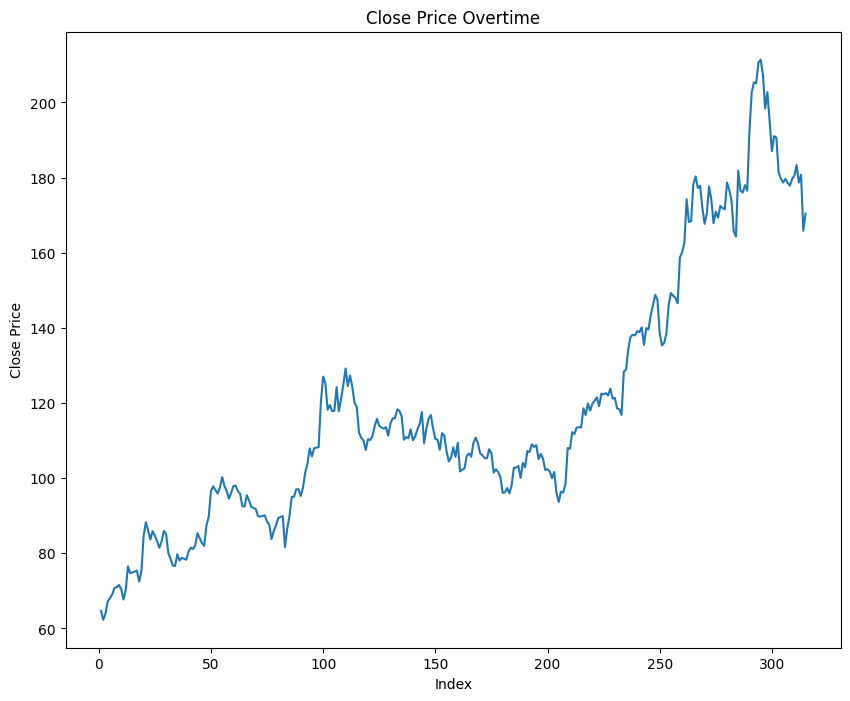

In [110]:
#plot close price (Draw close price figure)
new_data['Close'].plot(figsize = (10, 8))
plt.title("Close Price Overtime")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()

In [114]:
#define target x and y (calculate close)
x_new = new_data[['Open', 'Prev_close', 'High', 'Low']]
y_new = new_data['Close']

In [115]:
#predicted value with new data
new_predicted = regressor.predict(x_new)
print(x_new)
print(new_predicted)

           Open  Prev_close        High         Low
1     65.000000   64.019997   65.790001   63.310001
2     64.150002   64.660004   64.349998   62.299999
3     63.150002   62.330002   64.300003   60.049999
4     66.220001   63.959999   69.320000   65.669998
5     66.669998   67.239998   68.150002   66.559998
..          ...         ...         ...         ...
311  180.100006  180.490005  187.240005  179.899994
312  179.470001  183.339996  180.100006  174.830002
313  177.539993  178.699997  182.050003  176.699997
314  182.919998  180.770004  183.020004  165.649994
315  168.100006  165.830002  172.690002  165.580002

[315 rows x 4 columns]
[ 64.67797155  62.81767338  62.07325488  68.69839153  67.38377259
  68.17136139  69.49290006  69.93174388  71.86776888  71.6124045
  67.44501575  69.15126892  75.45416317  73.86604307  73.24523239
  75.86759411  75.13341378  72.83304369  74.03059665  83.98463929
  86.60856764  86.97690793  84.27768821  84.59245865  86.37353897
  84.64707532  80.98424

In [116]:
new_predicted.shape

(315,)

In [117]:
#Comparison predicted to actual test
_new_data = pd.DataFrame({"Actual": y_new, "Predicted": new_predicted})
print(_new_data)

         Actual   Predicted
1     64.660004   64.677972
2     62.330002   62.817673
3     63.959999   62.073255
4     67.239998   68.698392
5     68.050003   67.383773
..          ...         ...
311  183.339996  184.679715
312  178.699997  175.367892
313  180.770004  179.604012
314  165.830002  171.893326
315  170.419998  170.222146

[315 rows x 2 columns]


In [119]:
#Score
regressor.score(x_new, y_new)

0.9978377714826178

In [122]:
import math
print("Mean Absolute Error ", metrics.mean_absolute_error(y_new, new_predicted))
print("Mean Square Error ", metrics.mean_squared_error(y_new, new_predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_new, new_predicted)))

Mean Absolute Error  1.1787247002122931
Mean Square Error  2.5077600944398735
Root Mean Error  1.5835908860687073


In [123]:
new_predicted = regressor.predict(x_new)
print(new_predicted)

[ 64.67797155  62.81767338  62.07325488  68.69839153  67.38377259
  68.17136139  69.49290006  69.93174388  71.86776888  71.6124045
  67.44501575  69.15126892  75.45416317  73.86604307  73.24523239
  75.86759411  75.13341378  72.83304369  74.03059665  83.98463929
  86.60856764  86.97690793  84.27768821  84.59245865  86.37353897
  84.64707532  80.98424775  82.87911043  84.29411317  84.10012913
  80.46564551  77.90648295  77.08227822  77.07486311  80.90350496
  77.21888793  79.67350192  78.78756585  79.23682448  78.98091326
  80.46369191  82.34947663  83.33765693  84.6797384   85.80229058
  83.31187076  80.66154747  87.32184987  88.64732709  94.04217881
  97.574896    93.86524938  96.42968914  99.68918059 101.51406779
  97.3291966   96.85151819  94.231123    96.26960783  99.11498034
  96.44131612  94.97939608  96.04829298  91.85936497  91.46815236
  93.78592367  93.90735229  93.04551778  92.48016769  91.56904874
  88.67455832  90.95616309  89.23987445  90.24205375  88.45278296
  87.109079

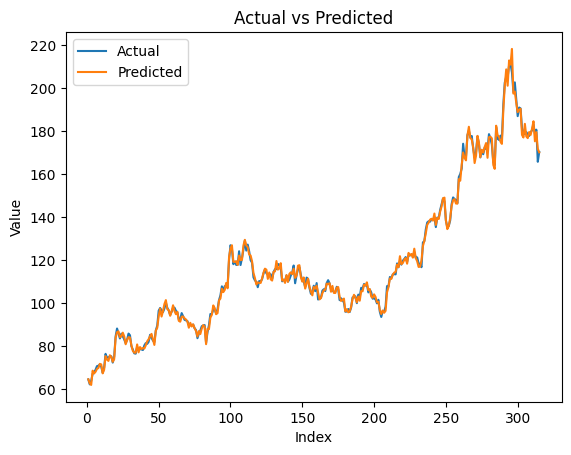

In [128]:
#plot the graph
plt.plot(y_new.index, y_new, label = "Actual")
plt.plot(y_new.index, new_predicted, label = "Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [129]:
#Export jupyter notebook files to py files
!jupyter nbconvert --to script your_notebook_name.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'your_notebook_name.ipynb' matched no files
